# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import os
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pickle
import pandas as pd
import random
import numpy as np
import csv
import cv2
import math
from sklearn.utils import shuffle
from collections import OrderedDict
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.filters import gaussian
from scipy.ndimage import zoom
from tensorflow.contrib.layers import flatten
from PIL import Image
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
# Split of a part of the training set!!
#import numpy as np
#from sklearn.model_selection import train_test_split
#X_train, X_validation, y_train , y_validation = train_test_split(X_train, y_train,test_size=0.1, random_state=0)
#X_valid = np.concatenate((X_valid, X_validation), axis=0)
#y_valid = np.concatenate((y_valid, y_validation), axis=0)

# print out some informations about the data sets
print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Training Set:   {} shape".format(X_train.shape))
print("Training Labels:{} shape".format(y_train.shape))
print("Valid Set:      {} samples".format(len(X_valid)))

#print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Training Set:   (34799, 32, 32, 3) shape
Training Labels:(34799,) shape
Valid Set:      4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples.
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(OrderedDict.fromkeys(y_train))

#df = pd.DataFrame(y_train)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Class ID of the radomly choosen image: ....  18
Sign name of the radomly choosen image: .... General caution


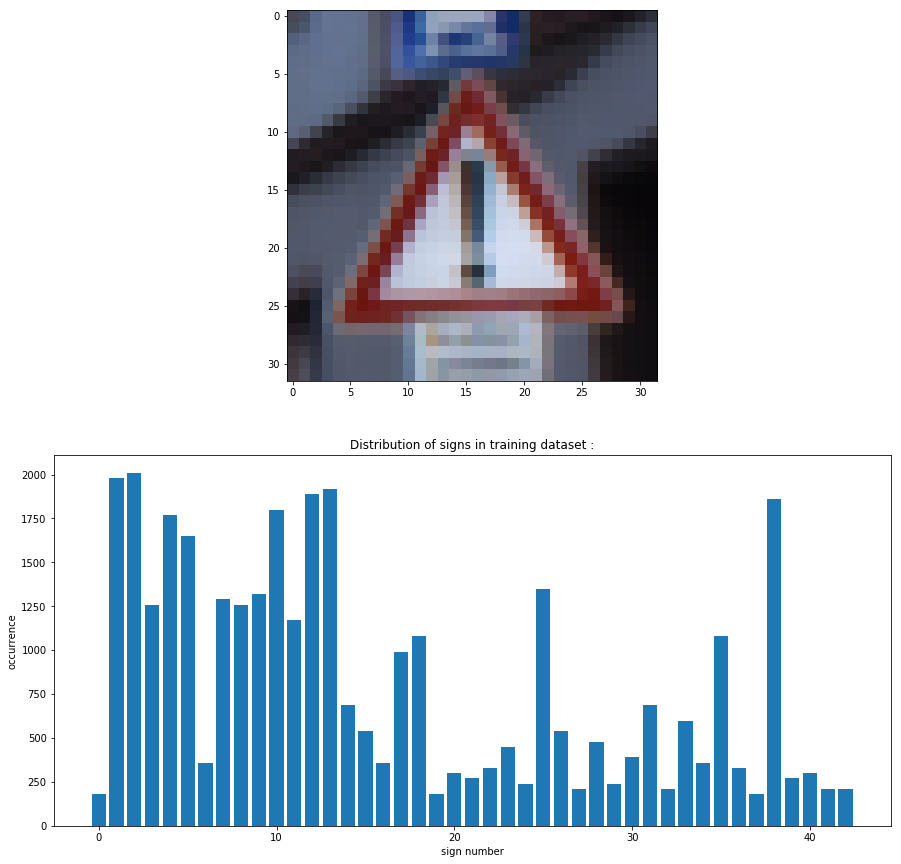

Distribution of signs in training dataset : 
 {0: 180, 1: 1980, 2: 2010, 3: 1260, 4: 1770, 5: 1650, 6: 360, 7: 1290, 8: 1260, 9: 1320, 10: 1800, 11: 1170, 12: 1890, 13: 1920, 14: 690, 15: 540, 16: 360, 17: 990, 18: 1080, 19: 180, 20: 300, 21: 270, 22: 330, 23: 450, 24: 240, 25: 1350, 26: 540, 27: 210, 28: 480, 29: 240, 30: 390, 31: 690, 32: 210, 33: 599, 34: 360, 35: 1080, 36: 330, 37: 180, 38: 1860, 39: 270, 40: 300, 41: 210, 42: 210}


In [5]:
%matplotlib inline

# Load signnames file
signnames = []
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    signnames = list(reader)

# choose a random sign out of the training dataset
index = random.randint(0, len(X_train))
#index = 8
image = np.asarray(X_train[index].squeeze())

# different/multiple plots possible
f, axarr = plt.subplots(2,figsize=(15,15))
# show the ClassId, SignName and image of the choosen sign
axarr[0].imshow(image, cmap="gray")

print('Class ID of the radomly choosen image: .... ', y_train[index])
print('Sign name of the radomly choosen image: ....',signnames[y_train[index]]['SignName'])

# Calculate and show the distribution of all signs in the training dataset
sign_dist_bi = np.bincount(y_train)

# get number of entries
def count(seq):
    counts = {}
    for num in seq:
        count = counts.get(num, 0)
        counts[num] = count + 1
    return counts
sign_dist = count(y_train)
plt.bar(*zip(*sorted(sign_dist.items())))
plt.title('Distribution of signs in training dataset :')
plt.xlabel('sign number')
plt.ylabel('occurrence')
plt.show()

print('Distribution of signs in training dataset : \n', sign_dist)

Working on classification problems, we need to know how balanced the class values are.
According to the histogram above, we have more examples of some signs and less of anothers, which means that traffic signs are highly imbalanced. 

Some categories such as "0 - Speed limit (20km/h)" and "37 - Go straight or left" make up only around 0.5% of the training data and test data, respectively, while others such as "2 - Speed limit (50km/h)" make up around 5.8 - a difference of factor 10. With as few as 180 tracks of training examples for some classes (i.e. 180 unique physical traffic sign instances), this is very little data to train on for some classes.

We can assume that this frequency distribution roughly represents the real-world distribution of traffic signs, but nonetheless we don't want our classifier to be biased towards the more frequent traffic sign classes because it gets trained more on those. It would, of course, be better if the training data was more equally distributed across the classes. Ideally, with the proces of data augmentation further below we could generate more fake data for those classes with fewer images, and less for those classes with more. But one must be careful not to overdo that for those classes with fewer images, as the augmented images might only have minor differences.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

### Data Augmentation

34799 training examples is an alright amount, but we want more data for a more robust classifier. I will expand the training dataset by creating a few slightly transformed versions of every image. The art, of course, lies in applying only transformations that create realistic data - data that similarly appears (a) in the real world and (b) in the validation and test data.

I will use the following transformations, all of which create effects that naturally occur in the dataset:
- Rotation
- Translation
- Scaling
- Brightness alteration (not done here)
- [Histogram equalization](http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html)

In [6]:
#data manipulation and add augmented data
AUGMENT_DATA = False

if AUGMENT_DATA:

    #####################################################
    X_train_new = np.expand_dims(np.copy(X_train[0]), axis=0) 
    y_train_new = np.copy(y_train[0])

    def img_rot(image):
        center = (IMAGE_SIZE/2, IMAGE_SIZE/2)
        fact = random.randint(-1,1)
        return cv2.warpAffine(image, cv2.getRotationMatrix2D(center, fact*15, 1), (IMAGE_SIZE, IMAGE_SIZE))

    def img_shift(image):
        fact1 = random.randint(-5,5)
        fact2 = random.randint(-5,5)
        return ndimage.shift(image,[fact1,fact2,0])

    def clipped_zoom(img, zoom_factor, **kwargs): # from stackoverflow ali_m

        h, w = img.shape[:2]

        # width and height of the zoomed image
        zh = int(np.round(zoom_factor * h))
        zw = int(np.round(zoom_factor * w))

        # for multichannel images we don't want to apply the zoom factor to the RGB
        # dimension, so instead we create a tuple of zoom factors, one per array
        # dimension, with 1's for any trailing dimensions after the width and height.
        zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

        # zooming out
        if zoom_factor < 1:
            # bounding box of the clip region within the output array
            top = (h - zh) // 2
            left = (w - zw) // 2
            # zero-padding
            out = np.zeros_like(img)
            out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

        # zooming in
        elif zoom_factor > 1:
            # bounding box of the clip region within the input array
            top = (zh - h) // 2
            left = (zw - w) // 2
            out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
            # `out` might still be slightly larger than `img` due to rounding, so
            # trim off any extra pixels at the edges
            trim_top = ((out.shape[0] - h) // 2)
            trim_left = ((out.shape[1] - w) // 2)
            out = out[trim_top:trim_top+h, trim_left:trim_left+w]

        # if zoom_factor == 1, just return the input array
        else:
            out = img
        return out

    def img_zoom(image):     
        zoom_f = float(0.85 + (random.randint(1,3)/10))
        return clipped_zoom(image, zoom_f) 

    #####################################################
    X_train = np.concatenate((X_train, X_valid), axis=0)
    y_train = np.concatenate((y_train, y_valid), axis=0)
    print("Number of training & val examples =", len(X_train))
    print("Number of training & val labels =", len(y_train))

    img_temp = []
    for i in range(X_train.shape[0]):
#        i = random.randint(0,len(y_train)-1)
        if sign_dist[y_train[i]] < 500: # 10 new images
            img_temp.append(img_rot(X_train[i]))
            img_temp.append(img_rot(X_train[i]))
            img_temp.append(img_rot(X_train[i]))
            img_temp.append(img_rot(X_train[i]))
            img_temp.append(img_shift(X_train[i]))
            img_temp.append(img_shift(X_train[i]))
            img_temp.append(img_shift(X_train[i]))
            img_temp.append(img_shift(X_train[i]))
            img_temp.append(img_zoom(X_train[i]))
            img_temp.append(img_zoom(X_train[i]))
        elif sign_dist[y_train[i]] < 1000: # 6 new images
            img_temp.append(img_rot(X_train[i]))
            img_temp.append(img_rot(X_train[i]))
            img_temp.append(img_shift(X_train[i]))
            img_temp.append(img_shift(X_train[i]))
            img_temp.append(img_zoom(X_train[i]))
            img_temp.append(img_zoom(X_train[i]))
        elif sign_dist[y_train[i]] < 1500: # 4 new images
            img_temp.append(img_rot(X_train[i]))
            img_temp.append(img_rot(X_train[i]))
            img_temp.append(img_shift(X_train[i]))
            img_temp.append(img_zoom(X_train[i]))
        elif sign_dist[y_train[i]] < 2500: # 2 new images
            img_temp.append(img_rot(X_train[i]))
            img_temp.append(img_zoom(X_train[i]))

        for m in range(len(img_temp)):
            X_train_new = np.concatenate((X_train_new, np.expand_dims(img_temp[m], axis=0)))
            y_train_new = np.append(y_train_new, y_train[i]) 
        img_temp = []

    print("Number of new training examples =", len(X_train_new))
    print("Number of new training labels =", len(y_train_new))
    X_train_new = np.concatenate((X_train, X_train_new), axis=0)
    y_train_new = np.concatenate((y_train, y_train_new), axis=0)

    # Create a dict out of augmented data
    new_dataset = {'features': X_train_new, 'labels': y_train_new}
    # Create a new pickle file with all the data
    new_train_val_file = 'traffic-signs-data/train_val_aug.p'
    with open(new_train_val_file, mode='wb') as f:
        pickle.dump(new_dataset, f)


else:
    new_train_val_file = 'traffic-signs-data/train_val_aug.p'
    with open(new_train_val_file, mode='rb') as f:
        train_val = pickle.load(f)
        
    X_train_new, y_train_new = train_val['features'], train_val['labels']

    
X_train, X_valid, y_train , y_valid = train_test_split(X_train_new, y_train_new,test_size=0.2, random_state=0)

In [7]:
# Number of training examples
n_train = len(X_train)
n_ytrain = len(y_train)
# Number of validation examples.
n_valid = len(X_valid)
n_yvalid = len(y_valid)
# Number of testing examples.
n_test = len(X_test)
# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
#  How many unique classes/labels there are in the dataset.
n_classes = len(OrderedDict.fromkeys(y_train))


print("Number of training examples =", n_train)
print("Number of training labels =", n_ytrain)
print("Number of validation examples =", n_valid)
print("Number of validation labels =", n_yvalid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)   

Number of training examples = 171235
Number of training labels = 171235
Number of validation examples = 42809
Number of validation labels = 42809
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Class ID of the radomly choosen augmented image: ....  15
Sign name of the radomly choosen augmented image: .... No vehicles


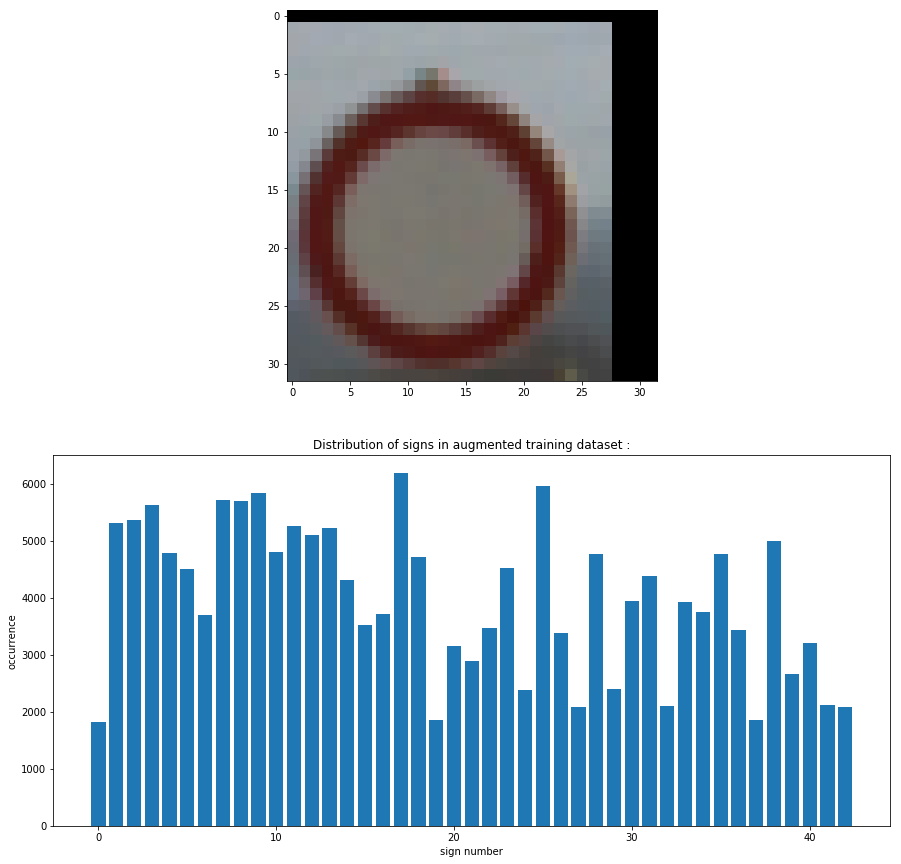

Distribution of signs in augmented training dataset : 
 {0: 1816, 1: 5305, 2: 5370, 3: 5633, 4: 4786, 5: 4498, 6: 3699, 7: 5705, 8: 5691, 9: 5828, 10: 4805, 11: 5254, 12: 5101, 13: 5214, 14: 4312, 15: 3526, 16: 3716, 17: 6190, 18: 4708, 19: 1853, 20: 3155, 21: 2893, 22: 3460, 23: 4522, 24: 2387, 25: 5955, 26: 3388, 27: 2092, 28: 4769, 29: 2397, 30: 3935, 31: 4382, 32: 2102, 33: 3921, 34: 3752, 35: 4768, 36: 3437, 37: 1853, 38: 4995, 39: 2664, 40: 3197, 41: 2119, 42: 2082}


In [9]:
#############################################################
# choose a random sign out of the training dataset
index = random.randint(0, len(X_train))
#index = 8
image = np.asarray(X_train[index].squeeze())

# different/multiple plots possible
f, axarr = plt.subplots(2,figsize=(15,15))
# show the ClassId, SignName and image of the choosen sign
axarr[0].imshow(image, cmap="gray")

print('Class ID of the radomly choosen augmented image: .... ', y_train[index])
print('Sign name of the radomly choosen augmented image: ....',signnames[y_train[index]]['SignName'])
# Calculate and show the distribution of all signs in the training dataset
sign_dist_bi = np.bincount(y_train)

# get number of entries
def count(seq):
    counts = {}
    for num in seq:
        count = counts.get(num, 0)
        counts[num] = count + 1
    return counts
sign_dist = count(y_train)
plt.bar(*zip(*sorted(sign_dist.items())))
plt.title('Distribution of signs in augmented training dataset :')
plt.xlabel('sign number')
plt.ylabel('occurrence')
plt.show()
print('Distribution of signs in augmented training dataset : \n', sign_dist)

Now we are clearly closer to a uniform distribution that before. The misalignment is reduced from factor 10 to 3.

In [10]:
# Preprocessing Data Normalize
def preproc_image(image):
    image[:,:,0]= cv2.equalizeHist(image[:,:,0])
    image[:,:,1]= cv2.equalizeHist(image[:,:,1])
    image[:,:,2]= cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    return image

#def preproc_image1(image):
# create a CLAHE object (Arguments are optional).
#    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#    cl1 = clahe.apply(img)
#    image[:,:,0]= clahe.apply(image[:,:,0])
#    image[:,:,1]= clahe.apply(image[:,:,1])
#    image[:,:,2]= clahe.apply(image[:,:,2])
#    image = image/255.-.5
#    return image


X_train_nor = np.array([preproc_image(X_train[i]) for i in range(len(X_train))], dtype = np.float32)
X_valid_nor = np.array([preproc_image(X_valid[i]) for i in range(len(X_valid))], dtype = np.float32)
X_test_nor = np.array([preproc_image(X_test[i]) for i in range(len(X_test))], dtype = np.float32)

X_train = X_train_nor
X_valid = X_valid_nor
X_test = X_test_nor

In [11]:
# Greyscale images
#X_train_gr = rgb2gray(X_train)
#X_valid_gr = rgb2gray(X_valid)
#X_test_gr = rgb2gray(X_test)

# Normalize images
#X_train_gr -=0.5
#X_valid_gr -=0.5
#X_test_gr -=0.5

# remove noise
#gaussian(X_train_gr, sigma=0.5)
#kernel_size = 7
#X_train_gr = cv2.GaussianBlur(X_train_gr,(kernel_size, kernel_size), 0)

# resize Matrix
#X_train_gr.resize(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
#X_valid_gr.resize(X_valid.shape[0],X_valid.shape[1],X_valid.shape[2],1)
#X_test_gr.resize(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)


Class ID of the radomly choosen image: ....  3
Sign name of the radomly choosen image: .... Speed limit (60km/h)
Image data shape = (32, 32, 3)


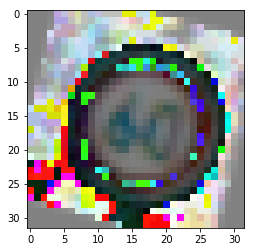

In [16]:
#############################################################
# choose a random sign out of the training dataset
index = random.randint(0, len(X_train))
image = np.asarray(X_train[index].squeeze())
#image_gr = np.asarray(X_train_gr[index].squeeze())
print('Class ID of the radomly choosen image: .... ', y_train[index])
print('Sign name of the radomly choosen image: ....',signnames[y_train[index]]['SignName'])

# different/multiple plots possible
#f, axarr = plt.subplots(1,2,figsize=(10,10))
# show the ClassId, SignName and image of the choosen sign
#axarr[0].imshow(image, cmap="gray")
#axarr[1].imshow(image_gr, cmap="gray")

image_shape = X_train[index].shape
print("Image data shape =", image_shape)
plt.imshow(image, cmap="gray")
plt.show()

### Model Architecture

In [17]:
# setting of epoch, batch_size, learning rate, dropout, which affect the training speed and model accuracy
IMAGE_SIZE = 32
# Network Parameters
N_INPUT = 1024 # im shape (32x32)
N_CLASSES = 43 # number of unique signs
# Parameters 
EPOCHS = 19
BATCH_SIZE = 256
LEARNING_RATE = 0.001
DROPOUT = 0.5

In [18]:
# def of convolution
def conv2d(x,W,b,strides):
    x = tf.nn.conv2d(x,W,strides = [1,strides, strides,1], padding = 'SAME')
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x)

# def of max_pooling
def maxpool2d(x, k):
    return tf.nn.max_pool(x, ksize = [1,k,k,1], strides = [1,k,k,1], padding = 'SAME')

# def of LeNet
def NeuralNetwork(x, dropit):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    c_in = 3
    c1 = 32
    c2 = 64
    c3 = 128
    d0 = 2048
    d1 = 512
    d2 = 128
    
    weights = {
                'wc1a' : tf.Variable(tf.truncated_normal([5,5,c_in,c1],mu,sigma)),
                'wc2a' : tf.Variable(tf.truncated_normal([5,5,c1,c2],mu,sigma)),
                'wc1b' : tf.Variable(tf.truncated_normal([3,3,c_in,c1],mu,sigma)),
                'wc2b' : tf.Variable(tf.truncated_normal([3,3,c1,c2],mu,sigma)),
                'wc3b' : tf.Variable(tf.truncated_normal([3,3,c2,c3],mu,sigma)),
                'wc1c' : tf.Variable(tf.truncated_normal([1,1,c_in,c1],mu,sigma)),
                'wc2c' : tf.Variable(tf.truncated_normal([1,1,c1,c2],mu,sigma)),
                'wd1' : tf.Variable(tf.truncated_normal([d0,d1],mu,sigma)),
                'wd2' : tf.Variable(tf.truncated_normal([d1,d2],mu,sigma)),
                'out' : tf.Variable(tf.truncated_normal([d2,N_CLASSES],mu,sigma)),
    }
    
    biases = {
                'bc1a' : tf.Variable(tf.random_normal([c1])),
                'bc2a' : tf.Variable(tf.random_normal([c2])),
                'bc1b' : tf.Variable(tf.random_normal([c1])),
                'bc2b' : tf.Variable(tf.random_normal([c2])),
                'bc3b' : tf.Variable(tf.random_normal([c3])),
                'bc1c' : tf.Variable(tf.random_normal([c1])),
                'bc2c' : tf.Variable(tf.random_normal([c2])),
                'bd1' : tf.Variable(tf.random_normal([d1])),
                'bd2' : tf.Variable(tf.random_normal([d2])),
                'out' : tf.Variable(tf.random_normal([N_CLASSES])),
    }
##########################################################################      
    # Layer 1a: Convolutional. Input = 32x32x1. Output = 28x28x6.
#    conv1a = conv2d(x, weights['wc1a'], biases['bc1a'], strides = 1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
#    conv1a = maxpool2d(conv1a, k=2)    
    # Dropout
#    conv1a = tf.nn.dropout(conv1a, dropit)

    # Layer 2a: Convolutional. Output = 10x10x16.
#    conv2a = conv2d(conv1a, weights['wc2a'], biases['bc2a'], strides = 1)    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
#    conv2a = maxpool2d(conv2a, k=2)   
    # Dropout
#    conv2a = tf.nn.dropout(conv2a, dropit)   
##########################################################################    
    # Layer 1b: Convolutional. Input = 32x32x1. Output = 32x32x16.
    conv1b = conv2d(x, weights['wc1b'], biases['bc1b'], strides = 1)
    # Pooling. Input = 32x32x16. Output = 16x16x16.
    conv1b = maxpool2d(conv1b, k=2)    
    # Dropout
#    conv1b = tf.nn.dropout(conv1b, dropit)

    # Layer 2b: Convolutional. Input = 16x16x16, Output = 16x16x64.
    conv2b = conv2d(conv1b, weights['wc2b'], biases['bc2b'], strides = 1)    
    # Pooling. Input = 16x16x64. Output = 8x8x64.
    conv2b = maxpool2d(conv2b, k=2)     
    # Dropout
#    conv2b = tf.nn.dropout(conv2b, dropit) 

    # Layer 3b: Convolutional. Input = 8x8x64, Output = 8x8x128.
    conv3b = conv2d(conv2b, weights['wc3b'], biases['bc3b'], strides = 1)    
    # Pooling. Input = 8x8x128. Output = 4x4x128.
    conv3b = maxpool2d(conv3b, k=2)     
    # Dropout
#    conv3b = tf.nn.dropout(conv3b, dropit) 
#########################################################################    
    # Layer 1c: Convolutional. Input = 32x32x1. Output = 32x32x6.
#    conv1c = conv2d(x, weights['wc1c'], biases['bc1c'], strides = 1)
    # Pooling. Input = 32x32x6. Output = 16x16x6.
#    conv1c = maxpool2d(conv1c, k=2)    
    # Dropout
#    conv1c = tf.nn.dropout(conv1c, dropit)

    # Layer 2c: Convolutional. Input = 16x16x6, Output = 16x16x16.
#    conv2c = conv2d(conv1c, weights['wc2c'], biases['bc2c'], strides = 1)    
    # Pooling. Input = 16x16x16. Output = 8x8x16.
#    conv2c = maxpool2d(conv2c, k=2)     
    # Dropout
#    conv2c = tf.nn.dropout(conv2c, dropit)   
#########################################################################     
   
    # Flatten Layer 1a Input = 14x14x6. Output = 1176
#    num_fla = conv1a.get_shape()[1:4].num_elements()
#    fla = tf.reshape(conv1a,[-1,num_fla])
    # Flatten Layer 2a Input = 5x5x16. Output = 400
#    num_f2a = conv2a.get_shape()[1:4].num_elements()
#    f2a = tf.reshape(conv2a,[-1,num_f2a])    

    # Flatten Layer 1b Input = 15x15x6. Output = 1350
#    num_flb = conv1b.get_shape()[1:4].num_elements()
#    flb = tf.reshape(conv1b,[-1,num_flb])
    # Flatten Layer 2b Input = 7x7x16. Output = 784
#    num_f2b = conv2b.get_shape()[1:4].num_elements()
#    f2b = tf.reshape(conv2b,[-1,num_f2b])    

    # Flatten Layer 1c Input = 16x16x6. Output = 1536
#    num_flc = conv1c.get_shape()[1:4].num_elements()
#    flc = tf.reshape(conv1c,[-1,num_flc])
    # Flatten Layer 2c Input = 8x8x16. Output = 1024
#    num_f2c = conv2c.get_shape()[1:4].num_elements()
#    f2c = tf.reshape(conv2c,[-1,num_f2c])   
    
#    print('fla : ', fla.get_shape(), num_fla)
#    print('f2a : ', f2a.get_shape(), num_f2a)
#    print('flb : ', flb.get_shape(), num_flb)
#    print('f2b : ', f2b.get_shape(), num_f2b)    
#    print('flc : ', flc.get_shape(), num_flc)
#    print('f2c : ', f2c.get_shape(), num_f2c)
    
    # Add layer together Output = 6270
#    fl_sum = tf.concat(1, [fla, f2a,flb, f2b,flc, f2c])
#    print('fl_sum : ', fl_sum.get_shape())

# Flatten Layer 3b Input = 4x4x128. Output = 2048
    fl_sum = flatten(conv3b)
##########################################################################                                      
    # Layer 3: Fully Connected. Input = 2048. Output = 512.
    fc1 = tf.add(tf.matmul(fl_sum, weights['wd1']),biases['bd1'])   
    # Activation.
    fc1 = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, dropit)     
##########################################################################    
    # Layer 4: Fully Connected. Input = 512. Output = 128.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']),biases['bd2'])     
    # Activation.
    fc2 = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, dropit)    
##########################################################################    
    # Layer 5: Fully Connected. Output Layer -class prediction Input = 128. Output = 43.
    logits =  tf.add(tf.matmul(fc2, weights['out']),biases['out'])

  
    return logits

### Features and Labels

In [19]:
### x is a placeholder for a batch of input images
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
### y is a placeholder for a batch of output labels
y = tf.placeholder(tf.int32, (None))
### define the one hot encoder
one_hot_y = tf.one_hot(y, 43)
### define keep_probs for dropout
keep_prob = tf.placeholder(tf.float32)

### Training Pipeline

In [20]:
### Training pipeline that uses the Network Model to classify the sign data
logits = NeuralNetwork(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
### Using AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
### Using GradientDescent Optimizer
#optimizer = tf.train.GradientDescentOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
#        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,
                                                           keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [22]:
save_file = "C:/Users/Woges/001_Know_How/011_project_traffic_sign/Model_Saver/color_AD_Augm_fin_002.ckpt"
valid_acc_history = []
sess_params = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
#    saver.restore(sess, save_file)
    print("Training...")
    print()
    for i in range(EPOCHS):
# shuffel training data, to prevent the network from learning the order of the signs
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
#            DROPOUT = 1-((0.5*i)/EPOCHS)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT})
### Calculate and report the accuracy on the training and validation set. 
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        valid_acc_history.append((training_accuracy, validation_accuracy))
        if i == (EPOCHS-1):
            print("EPOCH {} ...".format(i+1))
            print("DROPOUT {} ...".format(DROPOUT))        
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
    sess_params.append((EPOCHS, BATCH_SIZE, LEARNING_RATE, DROPOUT)) 
    print('EPOCHS : ', EPOCHS )
    print('BATCH_SIZE : ', BATCH_SIZE )
    print('LEARNING_RATE : ', LEARNING_RATE )
    print('DROPOUT : ', DROPOUT) 
    saver.save(sess, save_file)
    print("Model saved")
    with open('valid_acc_cAA_fin_history_002.p', 'wb') as f:
        pickle.dump(valid_acc_history, f)
    with open('session_cAA_fin_params_002.p', 'wb') as f:
        pickle.dump(sess_params, f)

Training...

EPOCH 19 ...
DROPOUT 0.5 ...
Training Accuracy = 0.999
Validation Accuracy = 0.997

EPOCHS :  19
BATCH_SIZE :  256
LEARNING_RATE :  0.001
DROPOUT :  0.5
Model saved


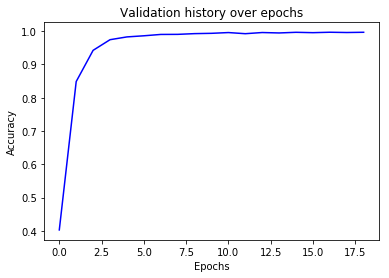

In [23]:
pickle_file = 'valid_acc_cAA_fin_history_002.p'
with open(pickle_file, mode='rb') as f:
    acc_history = pickle.load(f)
    
hist = np.transpose(np.array(acc_history))
plt.plot(hist[1], 'b')
plt.title('Validation history over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Evaluate the Model

In [24]:
save_file = "C:/Users/Woges/001_Know_How/011_project_traffic_sign/Model_Saver/color_AD_Augm_fin_002.ckpt"
with tf.Session() as sess:
#    saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, save_file)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.962


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

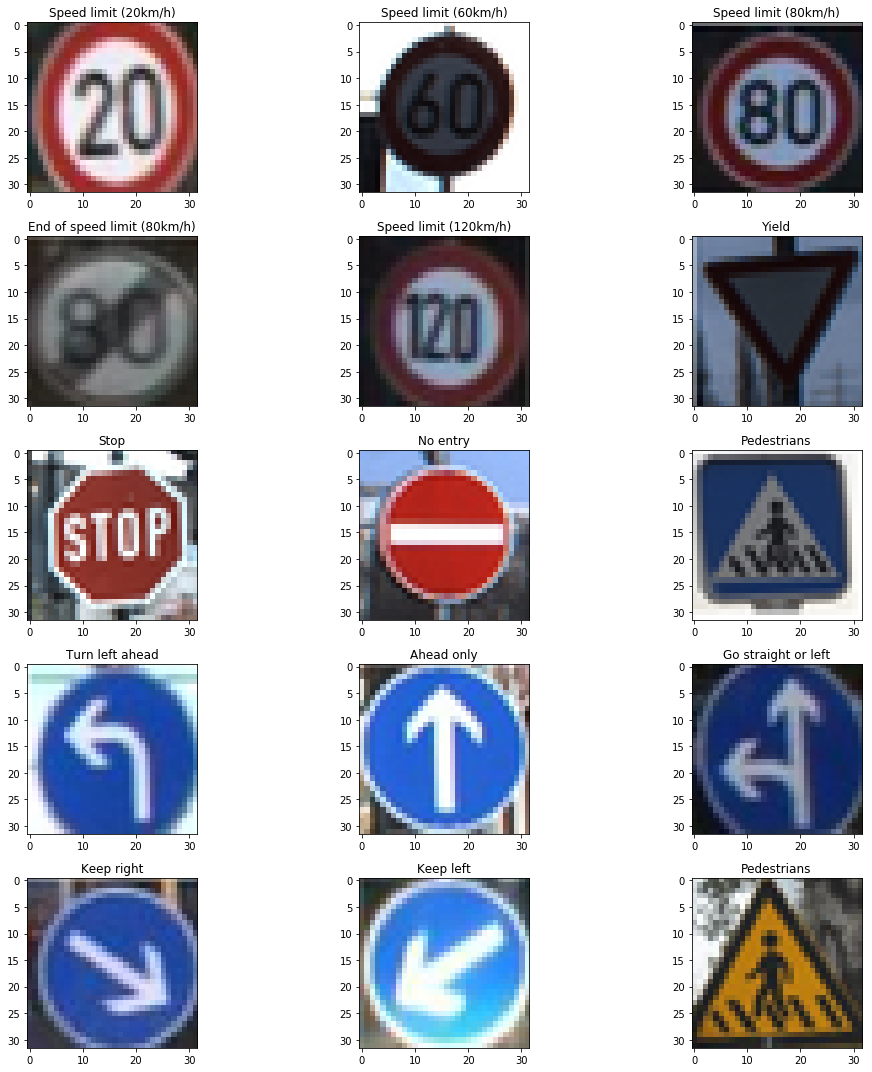

In [25]:
new_input = np.empty([0, 32,32,3])
input_org = []
new_name = []
for imgname in os.listdir("./traffic_signs_own/"):
    image_org = mpimg.imread('traffic_signs_own/' + imgname)
    input_org.append(image_org)
    image = image_org
    image.resize(1,IMAGE_SIZE,IMAGE_SIZE,3)    
    new_input = np.append(new_input, image, axis=0)
    new_name.append(imgname)

# Load imgnames file => image name corrsponding to sign it shows
imgnames = []
with open('imgnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    imgnames = list(reader)  
    
fig, ax = plt.subplots(5,3, sharex=True, figsize=(15,15))    
for k, image_pic in enumerate(input_org):
    plt.subplot(5,3,k+1)
    image_pic.resize(IMAGE_SIZE,IMAGE_SIZE,3) 
    plt.imshow(image_pic)
    for img_data in imgnames:
        if new_name[k] == img_data['Img_Name']:
            plot_title = (img_data['SignName'])
            plt.title(plot_title )
    
plt.tight_layout()   
plt.show()

### Predict the Sign Type for Each Image

In [26]:
labels_pred = tf.nn.softmax(logits)
save_file = "C:/Users/Woges/001_Know_How/011_project_traffic_sign/Model_Saver/color_AD_Augm_fin_002.ckpt"

prediction_img = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, save_file)
    top_k_vals, top_k_id = sess.run(tf.nn.top_k(prediction_img, 5), feed_dict={x: new_input,keep_prob: 1.0})

### Analyze Performance

In [27]:
#imgnames = []
with open('imgnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    imgnames = list(reader)

def sign_acc_cert(image, img_name, top_k_val, top_k_id):
    # Lookup top k indices in file
    count = 0
    top_k_pred = [signnames[index] for index in top_k_id]
    for img_data in imgnames:
        if img_name == img_data['Img_Name']:
            real_name = img_data['SignName']
    if top_k_pred[0]['SignName'] == real_name:
        count = 1
    return count    

success_sign = 0
for i in range(len(input_org)): 
    success_sign += sign_acc_cert(input_org[i], new_name[i], top_k_vals[i], top_k_id[i])
    
    
new_sign_accuracy = success_sign / len(input_org)

print("New Signs Accuracy = {:.3f}".format(new_sign_accuracy))

New Signs Accuracy = 0.867


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.


 
 Top 5 predictions :


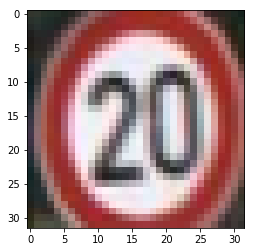

img_000.png  .....  Speed limit (20km/h) 

Speed limit (20km/h): 99.83%
Speed limit (120km/h): 0.11%
Speed limit (70km/h): 0.03%
Dangerous curve to the left: 0.02%
Speed limit (30km/h): 0.01%

 
 Top 5 predictions :


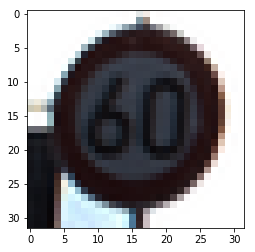

img_003.png  .....  Speed limit (60km/h) 

Speed limit (60km/h): 84.21%
No vehicles: 15.79%
No passing: 0.00%
Bicycles crossing: 0.00%
Yield: 0.00%

 
 Top 5 predictions :


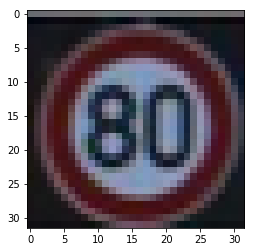

img_005.png  .....  Speed limit (80km/h) 

Speed limit (80km/h): 99.96%
Speed limit (60km/h): 0.02%
Speed limit (100km/h): 0.01%
Speed limit (50km/h): 0.01%
Speed limit (120km/h): 0.00%

 
 Top 5 predictions :


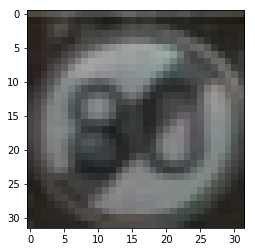

img_006.png  .....  End of speed limit (80km/h) 

End of speed limit (80km/h): 100.00%
End of all speed and passing limits: 0.00%
End of no passing by vehicles over 3.5 metric tons: 0.00%
End of no passing: 0.00%
Speed limit (80km/h): 0.00%

 
 Top 5 predictions :


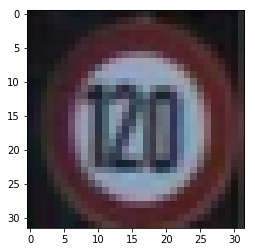

img_008.png  .....  Speed limit (120km/h) 

Speed limit (120km/h): 100.00%
Speed limit (70km/h): 0.00%
Speed limit (100km/h): 0.00%
No vehicles: 0.00%
Road narrows on the right: 0.00%

 
 Top 5 predictions :


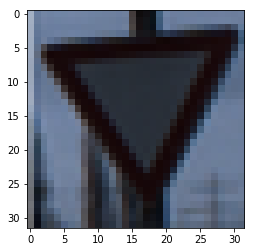

img_013.png  .....  Yield 

Yield: 100.00%
No vehicles: 0.00%
Priority road: 0.00%
End of all speed and passing limits: 0.00%
Stop: 0.00%

 
 Top 5 predictions :


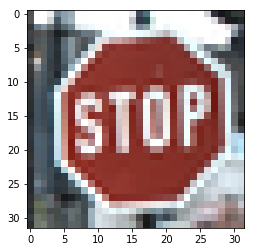

img_014.png  .....  Stop 

Stop: 100.00%
No entry: 0.00%
Yield: 0.00%
Speed limit (60km/h): 0.00%
Bicycles crossing: 0.00%

 
 Top 5 predictions :


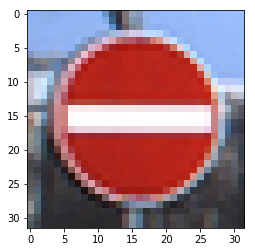

img_017.png  .....  No entry 

No entry: 100.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (50km/h): 0.00%
Speed limit (60km/h): 0.00%

 
 Top 5 predictions :


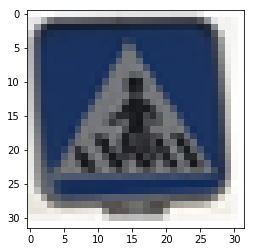

img_027.png  .....  Pedestrians 

Go straight or left: 60.24%
Roundabout mandatory: 39.45%
Keep left: 0.13%
Keep right: 0.09%
Turn left ahead: 0.05%

 
 Top 5 predictions :


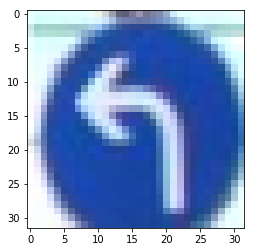

img_034.png  .....  Turn left ahead 

Turn left ahead: 100.00%
Go straight or left: 0.00%
Keep right: 0.00%
Ahead only: 0.00%
Roundabout mandatory: 0.00%

 
 Top 5 predictions :


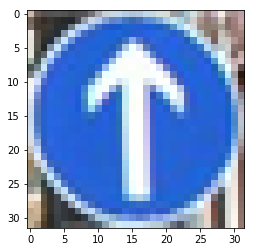

img_035.png  .....  Ahead only 

Ahead only: 100.00%
Turn right ahead: 0.00%
Go straight or left: 0.00%
Go straight or right: 0.00%
Turn left ahead: 0.00%

 
 Top 5 predictions :


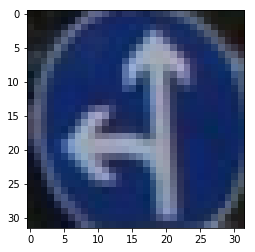

img_037.png  .....  Go straight or left 

Go straight or left: 100.00%
Roundabout mandatory: 0.00%
Keep left: 0.00%
Priority road: 0.00%
Turn right ahead: 0.00%

 
 Top 5 predictions :


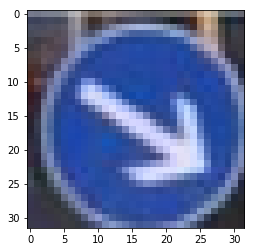

img_038.png  .....  Keep right 

Keep right: 100.00%
Roundabout mandatory: 0.00%
Turn left ahead: 0.00%
Go straight or left: 0.00%
Keep left: 0.00%

 
 Top 5 predictions :


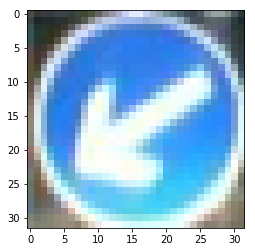

img_039.png  .....  Keep left 

Keep left: 100.00%
Turn right ahead: 0.00%
Go straight or left: 0.00%
Roundabout mandatory: 0.00%
End of all speed and passing limits: 0.00%

 
 Top 5 predictions :


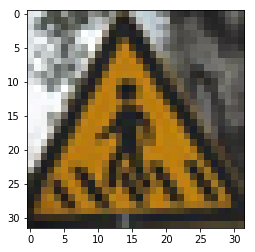

img_b27.png  .....  Pedestrians 

Traffic signals: 75.76%
Beware of ice/snow: 23.66%
Children crossing: 0.30%
Bicycles crossing: 0.19%
Right-of-way at the next intersection: 0.04%


In [28]:
def sign_prediction_cert(image, img_name, top_k_val, top_k_id):
    print('\n','\n','Top 5 predictions :')
    # Lookup top k indices in file
    top_k_pred = [signnames[index] for index in top_k_id]
    image.resize(IMAGE_SIZE,IMAGE_SIZE,3) 
    # Show the image for reference
    plt.imshow(image)
    plt.show()

    for img_data in imgnames:
        if img_name == img_data['Img_Name']:
            print(img_name, ' ..... ',img_data['SignName'], '\n')
    for i in range(5):
        print('%s: %.2f%%' % (top_k_pred[i]['SignName'].replace('\n', ''), top_k_val[i] * 100))


for i in range(len(input_org)):    
    sign_prediction_cert(input_org[i], new_name[i], top_k_vals[i], top_k_id[i])